In [11]:
%load_ext autoreload
%autoreload 2

In [12]:
from draw3d import *

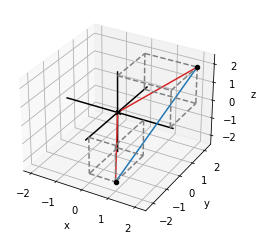

In [14]:
draw3d(
    Points3D((2,2,2), (1,-2,-2)),
     Segment3D((0,0,0), (2,2,2), color=red),
    Segment3D((0,0,0), (1,-2,-2), color=red),
    Segment3D((2,2,2), (1,-2,-2)),
    Box3D(2,2,2),
    Box3D(1,-2,-2)
)

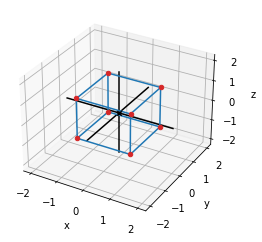

In [16]:
#Unit cube
pm1 = [1,-1]
vertices = [(x,y,z) for x in pm1 for y in pm1 for z in pm1]
edges = [((-1,y,z), (1,y,z)) for y in pm1 for z in pm1] +\
            [((x,-1,z), (x,1,z)) for x in pm1 for z in pm1] +\
            [((x,y,-1), (x,y,1)) for x in pm1 for y in pm1]
draw3d(Points3D(*vertices, color=red), *[Segment3D(*edge) for edge in edges])

In [21]:
def add(*vectors):
    by_coordinate = zip(*vectors)
    coordinate_sums = [sum(coords) for coords in by_coordinate]
    return tuple(coordinate_sums)

In [108]:
def subtract(v1,v2):
    return tuple(v1-v2 for (v1,v2) in zip(v1,v2))

In [22]:
add((1,3,5), (2,2,2), (3,3,3))

(6, 8, 10)

In [27]:
from math import sqrt

def length(v):
    return sqrt(sum([coord ** 2 for coord in v]))

In [28]:
length((3,4,12))

13.0

In [35]:
#scale
def scale(scalar, v):
    return tuple(scalar * coord for coord in v)

In [36]:
scale(5,(2,1,1))

(10, 5, 5)

In [38]:
# dot product

def dot(u,v):
    return sum([coord1 * coord2 for coord1,coord2 in zip(u,v)])

In [41]:
dot((2,3,5), (3,4,1))

23

In [92]:
# dot product returns the magnitude and the angle between two vectors
from math import cos,pi,acos
def dot_with_angle(*vectors):
    result = dot(*vectors)
    angle_division = result/(length(vectors[0]) * length(vectors[1]))
    angle = acos(angle_division)
    return tuple ((length(vectors[0]) * (length(vectors[1])), angle*180/pi))


In [93]:
dot_with_angle((1,2,2), (2,2,1))

(9.0, 27.266044450732828)

In [94]:
# cross product

def cross(u,v):
    ux,uy,uz = u
    vx,vy,vz = v
    return(uy*vz - uz*vy, uz*vx - ux*vz, ux*vy - uy*vx)

In [95]:
cross((0,0,3), (0,-2,0))

(6, 0, 0)

In [96]:
# rendering an octahedron
octahedron = [
    [(1,0,0), (0,1,0), (0,0,1)],
    [(1,0,0), (0,0,-1), (0,1,0)],
    [(1,0,0), (0,0,1), (0,-1,0)],
    [(1,0,0), (0,-1,0), (0,0,-1)],
    [(-1,0,0), (0,0,1), (0,1,0)],
    [(-1,0,0), (0,1,0), (0,0,-1)],
    [(-1,0,0), (0,-1,0), (0,0,1)],
    [(-1,0,0), (0,0,-1), (0,-1,0)],
]

In [97]:
def vertices(faces):
    return list(set([vertex for face in faces for vertex in face]))

In [98]:
def component(v, direction):
    return (dot(v,direction) / length(direction))

In [99]:
def vector_to_2d(v):
    return (component(v,(1,0,0)), component(v,(0,1,0)))

In [100]:
def face_to_2d(face):
    return [vector_to_2d(vertex) for vertex in face]

In [101]:
blues = matplotlib.cm.get_cmap('Blues')

In [102]:
def unit(v):
    return scale(1./length(v), v)

In [104]:
def normal(face):
    return(cross(subtract(face[1 ], face[0 ]), subtract(face[2 ], face[0 ])))

In [105]:
from draw2d import *

In [110]:
def render(faces, light=(1,2,3), color_map=blues, lines=None):
    polygons = []
    for face in faces:
        unit_normal = unit(normal(face)) #1
        if unit_normal[2] > 0: #2
            c = color_map(1 - dot(unit(normal(face)), unit(light))) #3
            p = Polygon2D(*face_to_2d(face), fill=c, color=lines) #4
            polygons.append(p)
    draw2d(*polygons,axes=False, origin=False, grid=None)

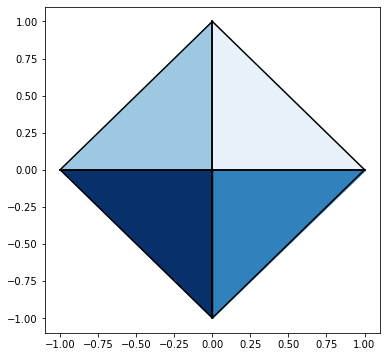

In [111]:
render(octahedron, color_map=matplotlib.cm.get_cmap('Blues'), lines=black)

In [112]:
def split(face):
    midpoints = [unit(add(face[i], face[(i+1)%len(face)])) for i in range(0,len(face))]
    triangles = [(face[i], midpoints[i], midpoints[(i-1)%len(face)]) for i in range(0,len(face))]
    return [midpoints] + triangles

def rec_split(faces, depth=0):
    if depth == 0:
        return faces
    else:
        return rec_split([new_face for face in faces for new_face in split(face)], depth-1)

# NICE SPHERE!
def sphere_approx(n):
    return rec_split(octahedron,n)

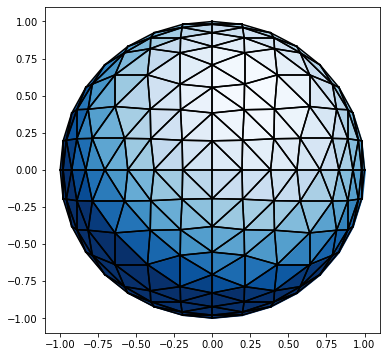

In [113]:
render(sphere_approx(3), lines='k')